In [ ]:
%matplotlib inline

import yt
import numpy as np
import matplotlib.pyplot as plt
import cgs as cgs

In [ ]:
LT_sims = np.genfromtxt('leo_T_simulations.txt', names=True)
jana_sims = np.genfromtxt('jana_simulations.txt', names=True)

P_RPS = (LT_sims['vmax']*1.0E5)**2 * LT_sims['n_halo'] * cgs.mp * 0.6
P_RPS_jana = (jana_sims['vmax']*1.0E5)**2 * jana_sims['n_halo'] * cgs.mp * 0.6

r_o = 300.0*cgs.pc
M_o = 4.82812180E41 # g
M_o = 3.3E6*cgs.Msun
M_HI = 2.8E5 * cgs.Msun

In [4]:
n_o_anal = np.linspace(0.0,2.0,100)

P_anal   = cgs.G * n_o_anal * M_o / (3.0*r_o) * 1.31 * cgs.mp


n_edge = LT_sims['n_halo'] * 0.6 * LT_sims['T_halo'] / LT_sims['T_dwarf'] / 1.31
P_edge   = cgs.G * n_edge * M_o / (3.0*r_o) * 1.31 * cgs.mp

n_avg  = M_HI / (4./3. * np.pi * r_o**3) /(cgs.mp * 1.31) * np.ones(np.size(LT_sims['n_halo']))


In [5]:
n_o_list = np.array([0.2]*6 + [0.75]*6 + [1.5]*6)
v1, v2 = 200.0, 400.0
v_list   = 1.0*np.array([v1]*3 + [v2]*3 + [v1]*3 + [v2]*3+ [v1]*3 + [v2]*3)
n_halo_list   = np.array([1.0E-5,1.0E-4,1.0E-3]*6)
# T = 6000
P_RPS_list = (v_list*1.0E5)**2 * (n_halo_list) * cgs.mp * 0.6


In [6]:
tau = 50000.0 * cgs.Myr
rho_v_KH = M_HI / (tau * np.pi * r_o * r_o)
v_KH     = rho_v_KH / (cgs.mp * 0.6 * n_halo_list[0:3])
print v_KH
P_RPS_KH_200 = (200.0E5)**2*n_halo_list[0:3] * cgs.mp * 0.6
P_RPS_KH_400 = (400.0E5)**2*n_halo_list[0:3] * cgs.mp * 0.6

tau_KH = M_HI/(np.pi * r_o * r_o * n_halo_list[0:6] * cgs.mp * 0.6 * (v_list[0:6]*1.0E5)) /cgs.Myr
print tau_KH

[ 13064966.56919079   1306496.65691908    130649.66569191]
[ 32662.41642298   3266.2416423     326.62416423  16331.20821149
   1633.12082115    163.31208211]


[  6.00000000e-05   6.00000000e-05   6.00000000e-05   6.00000000e-05]
0.0 6.91322197658e-13 2.258037e-14


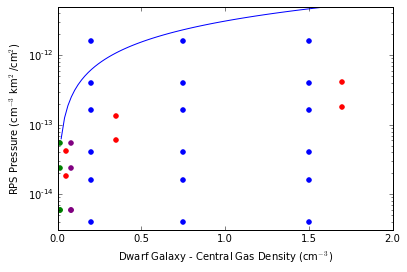

In [14]:
print LT_sims['n_halo']
#plt.scatter(LT_sims['n_o'], P_RPS, color='black', label='Me')
plt.scatter(jana_sims['n_o'], P_RPS_jana, color='red', label='Jana')

i = 0
ls = ['-','--','-.',':','-']
for alpha in np.array([3.0]):
    plt.plot(n_o_anal, P_anal * 3.0 * alpha, color='blue', ls=ls[i],label='alpha = %.2f'%(alpha))
    i = i + 1
plt.xlim(0.0,2.0)
plt.semilogy()
plt.scatter(n_edge,P_RPS,color='green', label='edge density')
plt.scatter(n_avg,P_RPS,color='purple', label='avg density')
plt.scatter(n_o_list, P_RPS_list, color = 'blue', label='proposed',s=20)
plt.xlabel(r'Dwarf Galaxy - Central Gas Density (cm$^{-3}$)')
plt.ylabel(r'RPS Pressure (cm$^{-3}$ km$^2$/cm$^{2}$)')
plt.ylim(0.0,5.0E-12)
#plt.legend(loc='best')
print np.min(P_anal),np.max(P_anal), np.average(P_RPS)

[  6.00000000e-05   6.00000000e-05   6.00000000e-05   6.00000000e-05]
0.0 6.91322197658e-13 2.258037e-14


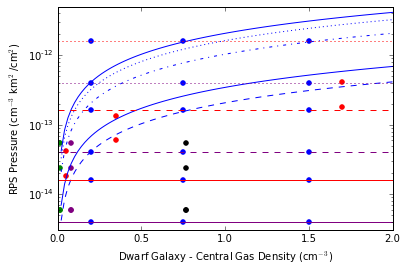

In [8]:
print LT_sims['n_halo']
plt.scatter(LT_sims['n_o'], P_RPS, color='black', label='Me')
plt.scatter(jana_sims['n_o'], P_RPS_jana, color='red', label='Jana')

i = 0
ls = ['-','--','-.',':','-']
for alpha in np.array([1./3.,1./5.,1.0,np.pi/2.,2.0]):
    plt.plot(n_o_anal, P_anal * 3.0 * alpha, color='blue', ls=ls[i],label='alpha = %.2f'%(alpha))
    i = i + 1
plt.xlim(0.0,2.0)
plt.semilogy()
plt.scatter(n_edge,P_RPS,color='green', label='edge density')
plt.scatter(n_avg,P_RPS,color='purple', label='avg density')
plt.scatter(n_o_list, P_RPS_list, color = 'blue', label='proposed')
plt.xlabel(r'Dwarf Galaxy - Central Gas Density (cm$^{-3}$)')
plt.ylabel(r'RPS Pressure (cm$^{-3}$ km$^2$/cm$^{2}$)')

plt.plot(plt.xlim(),[P_RPS_KH_200[0]]*2, color = 'purple', ls='-')
plt.plot(plt.xlim(),[P_RPS_KH_200[1]]*2, color = 'purple', ls='--')
plt.plot(plt.xlim(),[P_RPS_KH_200[2]]*2, color = 'purple', ls=':')


plt.plot(plt.xlim(),[P_RPS_KH_400[0]]*2, color = 'red', ls='-')
plt.plot(plt.xlim(),[P_RPS_KH_400[1]]*2, color = 'red', ls='--')
plt.plot(plt.xlim(),[P_RPS_KH_400[2]]*2, color = 'red', ls=':')

plt.ylim(0.0,5.0E-12)
#plt.legend(loc='best')
print np.min(P_anal),np.max(P_anal), np.average(P_RPS)

In [9]:
from initial_conditions import ic_list as icl
import cgs as cgs

Loading IC for  Leo_T
MUST SET A 'potential_type'
Loading IC for  Leo_T_obs
Assuming primordial neutral for dwarf mu = 1.31
Assuming primordial ionized for halo mu = 0.6
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  LT_n150_v2_nh3
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  LT_n150_v2_nh5
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.22478106861e+22 1.69442491018e-24 2.4531136761e+21 17.2221169764
Loading IC for  LT_n150_v2_nh4
If M200 or n_o are not set, they will be solved for
using the profile choice
NFW solve M200, R200, rho_s, r_s, c 6.15304635648e+41 4.2247810686

In [10]:
LT_test = icl.ic_object_dict['LT_n020_v2_nh5']
LT_test.ic
print "%5.5E %5.5E %5.5E %5.5E %5.5E"%(LT_test.ic['n_o'], LT_test.ic['n_halo'], LT_test.ic['M_HI']/cgs.Msun, LT_test.ic['T_halo'], LT_test.ic['Gamma_pe'])

LT_test = icl.ic_object_dict['LT_n075_v2_nh5']
LT_test.ic
print "%5.5E %5.5E %5.5E %5.5E %5.5E"%(LT_test.ic['n_o'], LT_test.ic['n_halo'], LT_test.ic['M_HI']/cgs.Msun, LT_test.ic['T_halo'], LT_test.ic['Gamma_pe'])

LT_test = icl.ic_object_dict['LT_n150_v2_nh5']
LT_test.ic
print "%5.5E %5.5E %5.5E %5.5E %5.5E"%(LT_test.ic['n_o'], LT_test.ic['n_halo'], LT_test.ic['M_HI']/cgs.Msun, LT_test.ic['T_halo'], LT_test.ic['Gamma_pe'])

LT_test = icl.ic_object_dict['LT_n020_v2_nh3']
LT_test.ic
print "%5.5E %5.5E %5.5E %5.5E %5.5E"%(LT_test.ic['n_o'], LT_test.ic['n_halo'], LT_test.ic['M_HI']/cgs.Msun, LT_test.ic['T_halo'], LT_test.ic['Gamma_pe'])

LT_test = icl.ic_object_dict['LT_n075_v2_nh3']
LT_test.ic
print "%5.5E %5.5E %5.5E %5.5E %5.5E"%(LT_test.ic['n_o'], LT_test.ic['n_halo'], LT_test.ic['M_HI']/cgs.Msun, LT_test.ic['T_halo'], LT_test.ic['Gamma_pe'])

LT_test = icl.ic_object_dict['LT_n150_v2_nh3']
LT_test.ic
print "%5.5E %5.5E %5.5E %5.5E %5.5E"%(LT_test.ic['n_o'], LT_test.ic['n_halo'], LT_test.ic['M_HI']/cgs.Msun, LT_test.ic['T_halo'], LT_test.ic['Gamma_pe'])


2.00000E-01 1.00000E-05 6.32399E+04 3.89304E+06 8.27187E-27
7.50000E-01 1.00000E-05 2.37150E+05 1.45989E+07 2.10235E-26
1.50000E+00 1.00000E-05 4.74299E+05 2.91978E+07 3.42884E-26
2.00000E-01 1.00000E-03 6.32399E+04 3.89304E+04 8.27187E-27
7.50000E-01 1.00000E-03 2.37150E+05 1.45989E+05 2.10235E-26
1.50000E+00 1.00000E-03 4.74299E+05 2.91978E+05 3.42884E-26


In [11]:
 M200, R200, rho_s, r_s, c= 6.15304635648e+41 ,4.22478106861e+22 ,1.69442491018e-24 ,2.4531136761e+21 ,17.2221169764


In [12]:
print "%5.5E %5.5E %5.5E"%(M200 / cgs.Msun , R200 / cgs.kpc, rho_s)


3.09338E+08 1.36916E+01 1.69442E-24
